# Split data from main dataset json

Train shape: (32,)
Test  shape: (18,)
Final shapes:
Train: (32,)
Validation: (9,)
Test: (9,)
Number of unique external_functions in train: 51
Number of unique external_functions in validation: 21
Number of unique external_functions in test: 23
No 'new' external_functions in validation set that aren't in training.
No 'new' external_functions in test set that aren't in training.
{'prompts': ['Create a function to find the smallest number in a list.', "The flow should create the built-in function node from the std library, called 'List.Min' node, should be used. The node should be created inside a function, with proper name.", "The built-in function 'List Min' should then be tested within a seperate module called tests, within the main module. Since the function does not contain input and ouput triggers, the flow of execution is sent between the assert nodes, using their input and output triggers. "], 'task_id': 2, 'specification': {'function_signature': 'func(doc: \\"finds the smallest n

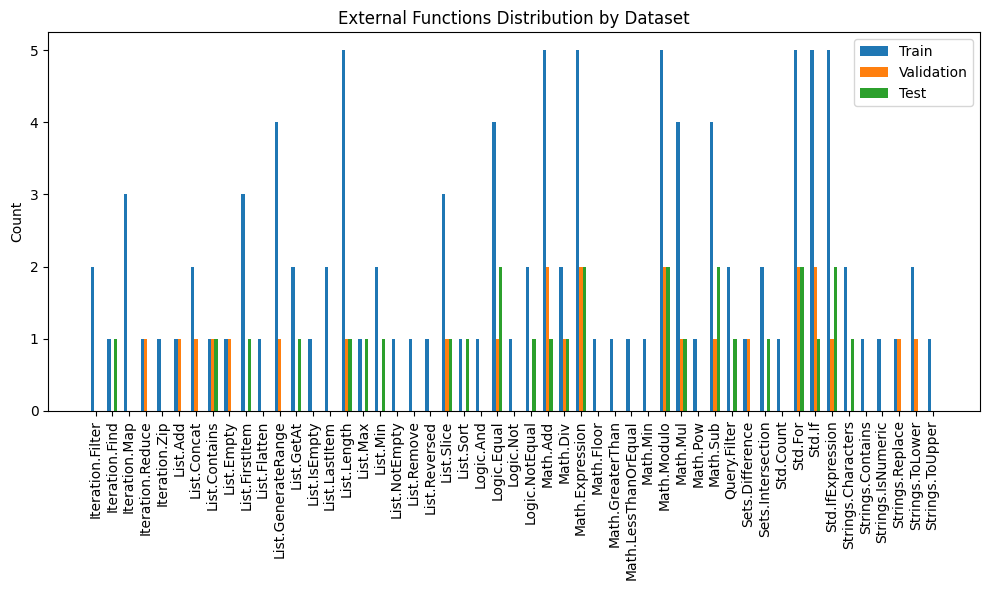

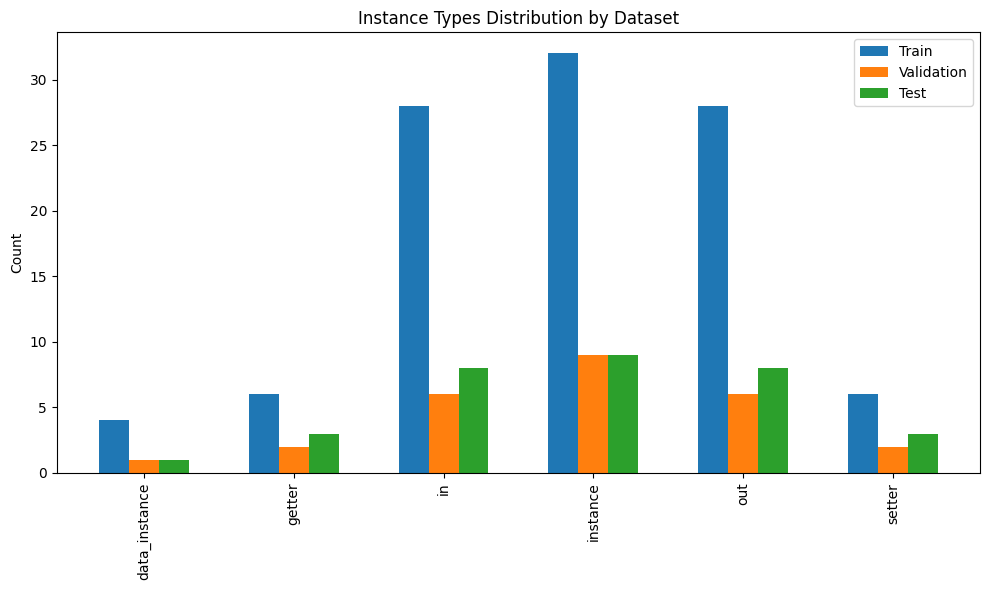

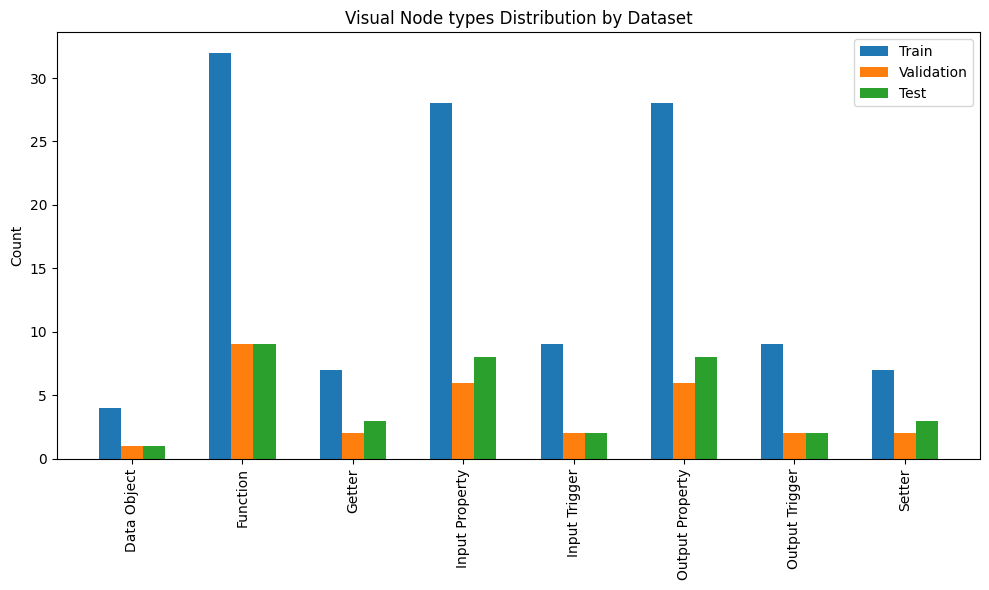

Library functions included in the dataset: 51


In [1]:

import sys
sys.path.append('../../')  # Add the path to the my_packages module
from my_packages.utils.file_utils import read_dataset_to_json
from my_packages.data_processing.split_dataset import multi_stratified_split
from my_packages.data_processing.attributes_processing import used_functions_from_dataset, used_functions_to_string
from my_packages.analysis.analyze_datasets import analyze_functions_distribution, analyze_instance_distribution, analyze_visual_node_types_distribution

main_dataset_folder = '../../data/MBPP-Midio-50.json'

# 1) Load the data
dataset = read_dataset_to_json(main_dataset_folder)
train, val, test = multi_stratified_split(dataset, True, 0.4, seed=58)
print(train[0])
# Analyze distribution across train / val / test
analyze_functions_distribution(train, val, test)
analyze_instance_distribution(train, val, test)
analyze_visual_node_types_distribution(train, val, test)

used_functions_json = used_functions_from_dataset(dataset)
available_nodes = used_functions_to_string(used_functions_json)

# Upload to Langsmith

## Node prediction

In [2]:

# import datetime
# from langsmith import Client, schemas
# from my_packages.prompting.few_shot import transform_node_data
# from dotenv import load_dotenv

# load_dotenv("../../.env")

# train_data = transform_node_data(train)
# val_data = transform_node_data(val)
# test_data = transform_node_data(test)

# data_splits = {
#     "train": train_data, 
#     "validation": val_data,
#     "test": test_data
# }

# langsmith = Client()
# langsmith_dataset_name = "Node prediction"

# if langsmith.has_dataset(dataset_name=langsmith_dataset_name):
#     langsmith_dataset=langsmith.read_dataset(dataset_name=langsmith_dataset_name)
#     print("Existing dataset found.")
#     print("Deleting existing dataset.")
#     examples = langsmith.list_examples(
#         dataset_name=langsmith_dataset_name,
#         splits=["train", "validation", "test"],
#         metadata={"task_id": "1"},
#         limit=5
#     )
#     for e in examples:
#         print(e.inputs)

#     input_str = input("Do you want to delete the existing dataset? (y/n): ")
#     if input_str.lower() == "y":
#         langsmith.delete_dataset(dataset_name=langsmith_dataset_name)
#         print("Existing dataset deleted.")
#     else:
#         print("Existing dataset not deleted.")
    
# else:
    
#     langsmith_dataset = langsmith.create_dataset(
#         dataset_name=langsmith_dataset_name, 
#         description="Tasks and responses for node prediction",
#         data_type=schemas.DataType.kv,
#     )
#     langsmith.update_dataset_tag(
#         dataset_name=langsmith_dataset_name,
#         as_of=datetime.datetime.now(), 
#         tag="dev"
#     )

#     print("New dataset created.")

#     # Upload the data to langsmith
#     for split_name, dataset in data_splits.items():
#         langsmith.create_examples(
#             inputs=[{"task": sample["task"]} for sample in dataset],
#             outputs=[{"response": sample["response"]} for sample in dataset],
#             metadata=[{
#                 "task_id": sample["task_id"], 
#                 "MBPP_task_id": sample["MBPP_task_id"],
#                 "external_functions": sample["external_functions"],
#                 }
#                 for sample in dataset
#             ],
#             splits=[split_name for _ in dataset],
#             dataset_name=langsmith_dataset_name,
#         )

## Code prediction

In [4]:

import datetime
from langsmith import Client, schemas
from my_packages.prompting.few_shot import transform_code_data
from dotenv import load_dotenv

load_dotenv("../../.env")
print(train[0])
train_data = transform_code_data(train)
val_data = transform_code_data(val)
test_data = transform_code_data(test)

data_splits = {
    "train": train_data, 
    "validation": val_data,
    "test": test_data
}

langsmith = Client()
langsmith_dataset_name = "Code prediction"

if langsmith.has_dataset(dataset_name=langsmith_dataset_name):
    langsmith_dataset=langsmith.read_dataset(dataset_name=langsmith_dataset_name)
    print("Existing dataset found.")
    print("Deleting existing dataset.")

    input_str = input("Do you want to delete the existing dataset? (y/n): ")
    if input_str.lower() == "y":
        langsmith.delete_dataset(dataset_name=langsmith_dataset_name)
        print("Existing dataset deleted.")
    else:
        print("Existing dataset not deleted.")
    
else:
    
    langsmith_dataset = langsmith.create_dataset(
        dataset_name=langsmith_dataset_name, 
        description="Tasks and responses for code prediction",
        data_type=schemas.DataType.kv,
    )
    langsmith.update_dataset_tag(
        dataset_name=langsmith_dataset_name,
        as_of=datetime.datetime.now(), 
        tag="dev"
    )

    print("New dataset created.")

    # Upload the data to langsmith
    for split_name, dataset in data_splits.items():
        langsmith.create_examples(
            inputs=[{"task": sample["task"], "function_signature": sample["function_signature"]} for sample in dataset],
            outputs=[{"response": sample["response"]} for sample in dataset],
            metadata=[{
                "task_id": sample["task_id"], 
                "MBPP_task_id": sample["MBPP_task_id"],
                "external_functions": sample["external_functions"],
                "testing": {
                    "function_signature": sample["function_signature"],
                    "tests": sample["tests"]
                }
            }
            for sample in dataset
            ],
            splits=[split_name for _ in dataset],
            dataset_name=langsmith_dataset_name,
        )

{'prompts': ['Create a function to find the smallest number in a list.', "The flow should create the built-in function node from the std library, called 'List.Min' node, should be used. The node should be created inside a function, with proper name.", "The built-in function 'List Min' should then be tested within a seperate module called tests, within the main module. Since the function does not contain input and ouput triggers, the flow of execution is sent between the assert nodes, using their input and output triggers. "], 'task_id': 2, 'specification': {'function_signature': 'func(doc: \\"finds the smallest number in a list.\\") smallest_num {\\n        in(x: -426, y: -248, name: \\"items\\") property(List) items_ai\\n        out(x: 159, y: -219, name: \\"min\\") property(Number) min_ai\\n}', 'preconditions': '- The input array should not be empty', 'postconditions': '- The returned value should be the smallest number in the input array'}, 'MBPP_task_id': 62, 'textual_instance_type